# Projeto de Redes Sociais

### Diferencas nas Redes Sociais de Game of Thrones no livro e na serie

---
***
___
### LIVRO:

##### Carregando datasets do livro:

In [13]:
import pandas as pd

# dataset do livro 1
book1 = pd.read_csv('data/book1-edges.csv')
book1.head()

,Source,Target,Type,weight,book
0,Addam-Marbrand,Jaime-Lannister,Undirected,3,1
1,Addam-Marbrand,Tywin-Lannister,Undirected,6,1
2,Aegon-I-Targaryen,Daenerys-Targaryen,Undirected,5,1
3,Aegon-I-Targaryen,Eddard-Stark,Undirected,4,1
4,Aemon-Targaryen-(Maester-Aemon),Alliser-Thorne,Undirected,4,1


Essa tabela apresenta as relacoes entre os personagens, sendo definidas pela presenca dos nomes de ambos com uma distancia de no maximo 15 palavras entre si.

As colunas Source e Target apresentam os personagens ligados entre si, a coluna Type determina o tipo de ligacao, sendo para este caso sempre nao direcionada. A coluna Weight apresenta o numero de ocorrencias de uma relacao entre os dois personagens no livro especificado pela coluna livro. Nesse caso, como estamos carregando os datasets de cada livro separadamente, a coluna livro nao tem muito proposito.

Observacao: As relacoes com Weight menor de 3 foram cortadas da tabela por serem consideradas acidentais em sua maioria.

##### Criando a rede do livro

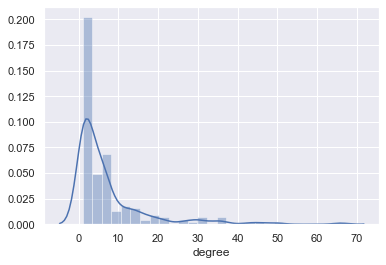

In [19]:
import networkx as nx
import freeman as fm
from random import randint

#book1_graph = nx.Graph()
g1 = fm.Graph(nx.empty_graph())

for n, edge in book1.iterrows():
    #print("NODEx: ", edge['Source'])
    #print("NODEy: ", edge['Target'])
    #print("EDGE_WEIGHT: ", edge['weight'])
    if(edge['Source'] not in g1):
        g1.add_node(edge['Source'], pos = [randint(0,800), randint(0,450)], label = edge['Source'])
    if(edge['Target'] not in g1):
        g1.add_node(edge['Target'], pos = [randint(0,800), randint(0,450)], label = edge['Target'])

for n, edge in book1.iterrows():  
    g1.add_edge(edge['Source'], edge['Target'], weight=edge['weight'])
    
g1.set_all_nodes('size', 12)
g1.set_all_nodes('labpos', 'hover')
g1.set_nodedata('degree', g1.degree)
g1.distest_nodes('degree')
g1.displot_nodes('degree')
#g1.move('step')
g1.move('kamada_kawai')
g1.scale_nodes_size(g1.degree)
#g1.color_nodes()
g1.draw()

In [27]:
b_livro = nx.betweenness_centrality(g1)

for n in b_livro:
    print(n, b_livro[n])

Addam-Marbrand 0.0
Jaime-Lannister 0.0320095542681723
Tywin-Lannister 0.026190475931508066
Aegon-I-Targaryen 0.0
Daenerys-Targaryen 0.08627015537511595
Eddard-Stark 0.2696038913836117
Aemon-Targaryen-(Maester-Aemon) 0.010844715683425361
Alliser-Thorne 0.005026701469957172
Bowen-Marsh 0.0
Chett 0.0
Clydas 0.0
Jeor-Mormont 0.028345621007255038
Jon-Snow 0.17158135899829566
Samwell-Tarly 0.014449634885820021
Aerys-II-Targaryen 0.00048173749786653005
Brandon-Stark 0.002080261918971597
Gerold-Hightower 0.02144725370531822
Jon-Arryn 0.012525043642810938
Robert-Baratheon 0.21403028397371796
Aggo 7.265329845975008e-05
Drogo 0.06481224290874964
Jhogo 4.359197907585004e-05
Jorah-Mormont 0.012611106728154204
Quaro 2.906131938390003e-05
Rakharo 3.390487261455003e-05
Albett 0.0
Halder 0.0002102102102102102
Rast 7.749685169040008e-05
Grenn 0.0002024605250411702
Pypar 7.459071975201007e-05
Tyrion-Lannister 0.1902124972697492
Alyn 0.0003145710264731398
Harwin 0.0003166711322941555
Jory-Cassel 0.0175245

In [29]:
b_livro["Eddard-Stark"]

0.2696038913836117

---
***
___
### SERIE:

##### Carregando dataset da serie:

In [3]:
# dataset da temporada 1
season1 = pd.read_csv('data/s1-edges.csv')
season1.head()

,Source,Target,Weight,Season
0,NED,ROBERT,192,1
1,DAENERYS,JORAH,154,1
2,JON,SAM,121,1
3,LITTLEFINGER,NED,107,1
4,NED,VARYS,96,1


##### Criando a rede da serie

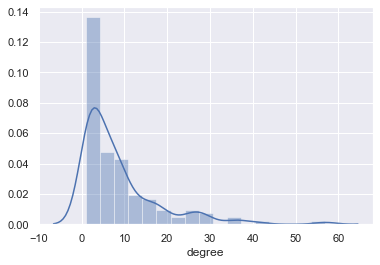

In [20]:
#book1_graph = nx.Graph()
s1 = fm.Graph(nx.empty_graph())

for n, edge in season1.iterrows():
    if(edge['Source'] not in s1):
        s1.add_node(edge['Source'], pos = [randint(0,800), randint(0,450)], label = edge['Source'])
    if(edge['Target'] not in s1):
        s1.add_node(edge['Target'], pos = [randint(0,800), randint(0,450)], label = edge['Target'])

for n, edge in season1.iterrows():  
    s1.add_edge(edge['Source'], edge['Target'], weight=edge['Weight'])
    
s1.set_all_nodes('size', 12)
s1.set_all_nodes('labpos', 'hover')
s1.set_nodedata('degree', s1.degree)
df = s1.distest_nodes('degree')
s1.displot_nodes('degree')
#s1.move('step')
s1.move('kamada_kawai')
s1.scale_nodes_size(s1.degree)
#s1.color_nodes()
#s1.scale_nodes_dark(nx.closeness_centrality(s1))
s1.draw()


In [5]:
df

,p-value
Shapiro-Wilk (normal),0.000000
D'Agostino-Pearson (normal),0.000000
Kolmogorov-Smirnov (normal),0.000023
Kolmogorov-Smirnov (powerlaw),0.000000
Kolmogorov-Smirnov (exponential),0.001954


In [26]:
b_serie = nx.betweenness_centrality(s1)

for n in b_serie:
    print(n, b_serie[n])

NED 0.3006678156106007
ROBERT 0.10989974270115796
DAENERYS 0.10075782537259582
JORAH 0.05342257003267803
JON 0.08512842627581105
SAM 0.03214407109645205
LITTLEFINGER 0.015700379776754644
VARYS 0.025424460116749734
DROGO 0.02792989205938548
ARYA 0.0656514696720996
CATELYN 0.12327285973045146
ROBB 0.07936180443779715
BRONN 0.003618935859578387
TYRION 0.16947408623776328
CERSEI 0.017653407677459952
SHAE 0.0
JOFFREY 0.028549694663168344
SANSA 0.01992488645309557
PYCELLE 0.0020485680198614404
VISERYS 0.00624781757694564
SEPTA_MORDANE 0.00020076043885567695
TYWIN 0.026441333439792717
JEOR 0.03534751985568738
THEON 0.02956314399888157
BRAN 0.0258184376805872
MAESTER_LUWIN 0.002503716741622247
JAIME 0.020701269829928558
LORAS 0.015914285714285714
RENLY 0.005546062361290171
MIRRI_MAZ_DUUR 0.0
SYRIO_FOREL 0.0
JORY_CASSEL 0.0014212018917901267
PYP 0.06035146783454571
ROS 0.0005410368621337217
GRENN 0.0018844163396352692
WALDER 0.0332172335600907
DOREAH 0.016318883108799073
BENJEN 0.00061621464955

In [30]:
b_serie["NED"]

0.3006678156106007